# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [10]:

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize

# Using numpy

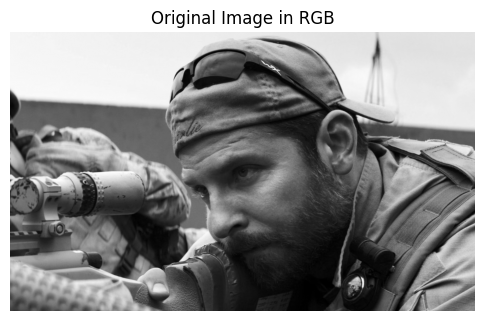

(1140, 1900)
244.81


In [24]:
img = cv.imread("american-sniper.jpg")
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
r = img_rgb[:,:,0]
g = img_rgb[:,:,1]
b = img_rgb[:,:,2]
gray = 0.3*r+0.59*g+0.11*b

plt.figure(figsize=(6,6))
plt.imshow(gray, cmap='gray')
plt.axis("off")
plt.title("Original Image in RGB")
plt.show()
print(gray.shape)
pixel_rand_value = gray[200,300]
print(pixel_rand_value)

# Using Libraries

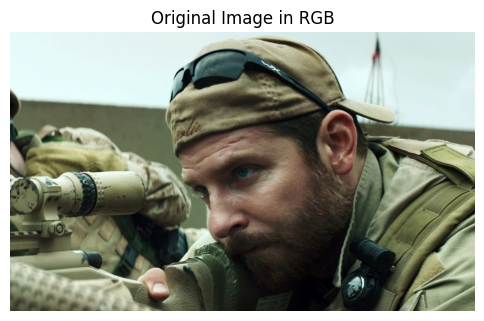

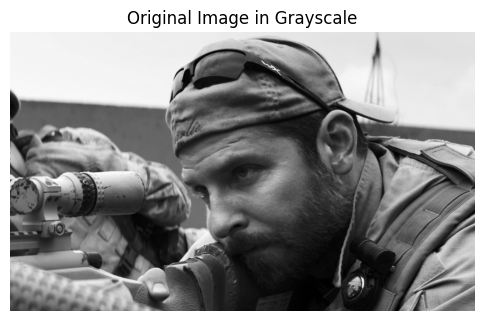

(1140, 1900)
(1140, 1900, 3)
[230 251 252]
245


In [25]:
img = cv.imread("american-sniper.jpg")
img_rgb =  cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_grayscale = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Original Image in RGB")
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(img_grayscale, cmap='gray')
plt.axis("off")
plt.axis("off")
plt.title("Original Image in Grayscale")
plt.show()
print(img_grayscale.shape)
print(img_rgb.shape)
pixel_rand_value2 = img_rgb[200,300]
print(pixel_rand_value2)
pixel_rand_value3 = img_grayscale[200,300]
print(pixel_rand_value3)

## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [28]:
img_grayscale_float = img_grayscale.astype(np.float32)

f = np.fft.fft2(img_grayscale_float)
f_shift = np.fft.fftshift(f)

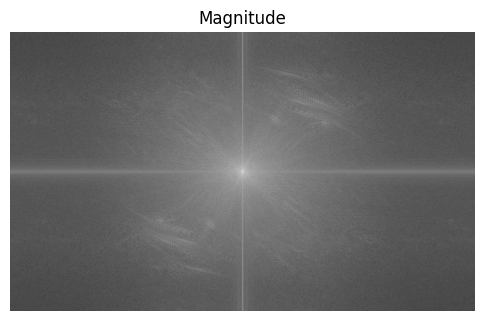

In [31]:
magnitude = 20*np.log(np.abs(f_shift)+1)
phase = np.angle(f_shift)
plt.figure(figsize=(6,6))
plt.imshow(magnitude, cmap='gray')
plt.axis("off")
plt.axis("off")
plt.title("Magnitude")
plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

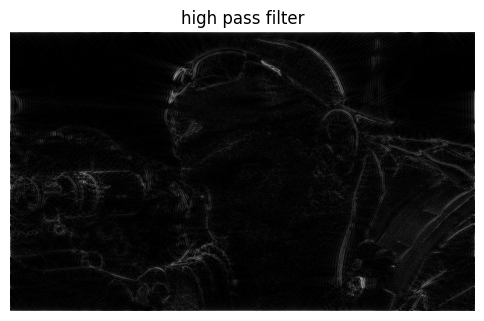

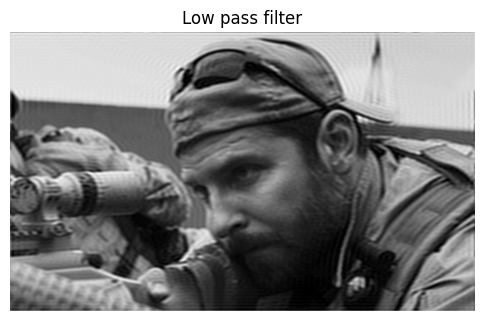

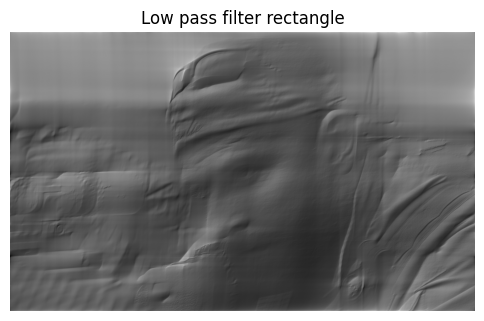

In [35]:
row,col = np.shape(img_grayscale)
crow,ccol = row//2,col//2
radius = 80
lpfmask = np.zeros((row,col), np.uint8)
cv.circle(lpfmask, (ccol,crow), radius, 1, -1)
hpfmask = 1-lpfmask
f_lpf = f_shift*lpfmask
f_hpf = f_shift*hpfmask

lpfmask_square = np.zeros((row,col), np.uint8)
cv.rectangle(lpfmask_square, (ccol,crow), (50,50), 1, -1)
f_lpf_square = f_shift*lpfmask_square

ishift_lpf2 = np.fft.ifftshift(f_hpf)
lpfimage2 = np.fft.ifft2(ishift_lpf2)
final_high = np.abs(lpfimage2)
plt.figure(figsize=(6,6))
plt.imshow(final_high, cmap='gray')
plt.axis("off")
plt.title("high pass filter")
plt.show()

ishift_lpf = np.fft.ifftshift(f_lpf)
lpfimage = np.fft.ifft2(ishift_lpf)
final_low = np.abs(lpfimage)
plt.figure(figsize=(6,6))
plt.imshow(final_low, cmap='gray')
plt.axis("off")
plt.title("Low pass filter")
plt.show()

ishift_sqpf = np.fft.ifftshift(f_lpf_square)
lpfimage3 = np.fft.ifft2(ishift_sqpf)
final_low = np.abs(lpfimage3)
plt.figure(figsize=(6,6))
plt.imshow(final_low, cmap='gray')
plt.axis("off")
plt.title("Low pass filter rectangle")
plt.show()



## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [2]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.
#magnitude sepcturm is barely visible and hence to increase the values we use the logarithm
# the given phase only is different from np.angle is that it is exponential

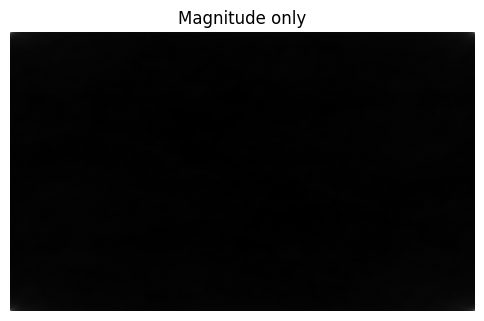

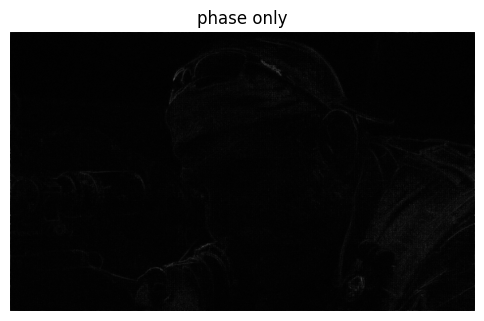

In [44]:
phase_only = fshift/np.abs(fshift)
mag_only = np.abs(fshift)
mag_only_reshift = np.fft.ifftshift(mag_only)
mag_only_re = np.fft.ifft2(mag_only_reshift)
final_mag_only = np.abs(mag_only_re)
plt.figure(figsize=(6,6))
plt.imshow(final_mag_only, cmap='gray')
plt.axis("off")
plt.title("Magnitude only")
plt.show()

phase_only_reshift = np.fft.ifftshift(phase_only)
phase_only_re = np.fft.ifft2(phase_only_reshift)
final_phase_only = np.abs(phase_only_re)
plt.figure(figsize=(6,6))
plt.imshow(final_phase_only, cmap='gray')
plt.axis("off")
plt.title("phase only")
plt.show()

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

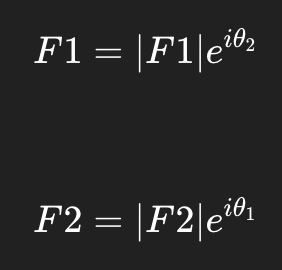

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

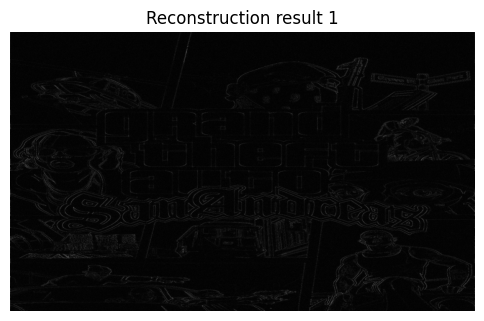

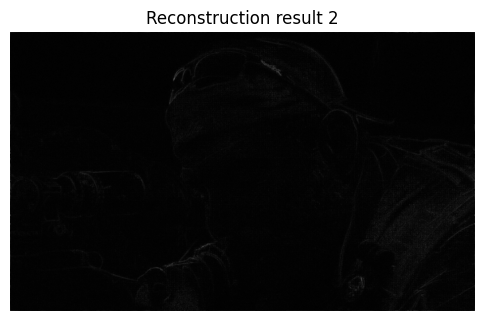

In [52]:
newimg = cv.imread("gta.jpg", cv.IMREAD_GRAYSCALE)
newimg = cv.resize(newimg, (img.shape[1],img.shape[0]))
newfloat = newimg.astype(np.float32)
fnew = np.fft.fft2(newfloat)
fnew_shift = np.fft.fftshift(fnew)
magnitudenew = 20*np.log(np.abs(fnew_shift)+1)
phase_new = np.angle(fnew_shift)

Combined1 = magnitude*np.exp(1j*phase_new)
combined2 = magnitudenew*np.exp(1j*phase)

recons1= np.fft.ifftshift(Combined1)
recons2= np.fft.ifftshift(combined2)
recons1_shift = np.fft.ifft2(recons1)
recons2_shift = np.fft.ifft2(recons2)
final1 = np.abs(recons1_shift)
final2 = np.abs(recons2_shift)
plt.figure(figsize=(6,6))
plt.imshow(final1.cmap, cmap='gray')
plt.axis("off")
plt.title("Reconstruction result 1")
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(final2, cmap='gray')
plt.axis("off")
plt.axis("off")
plt.title("Reconstruction result 2")
plt.show()

In [1]:
# yeah I see that the image whose phase is taken is visible in results, magnitude is playing a
#very little role